
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)

- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Corelation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. (remember how we did a sns.pairplot(df[[ "cylinders", "mpg","model_year"]]) and sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]]) and others. ) 

remember to have fun with this 

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [5]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\jermy\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [26]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv(r"C:\Users\jermy\Downloads/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts 0,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


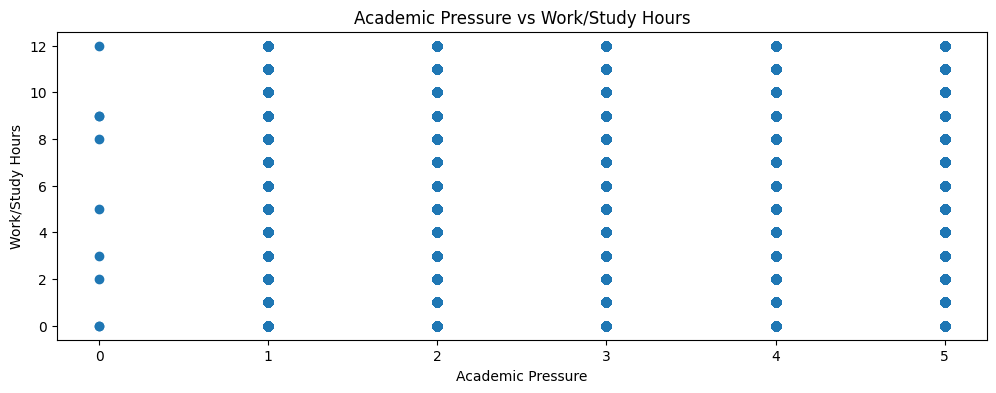

In [30]:
plt.figure(figsize=(12, 4))
plt.scatter(df['Academic Pressure'], df['Work/Study Hours'])
plt.xlabel("Academic Pressure")
plt.ylabel("Work/Study Hours")
plt.title("Academic Pressure vs Work/Study Hours")
plt.show()

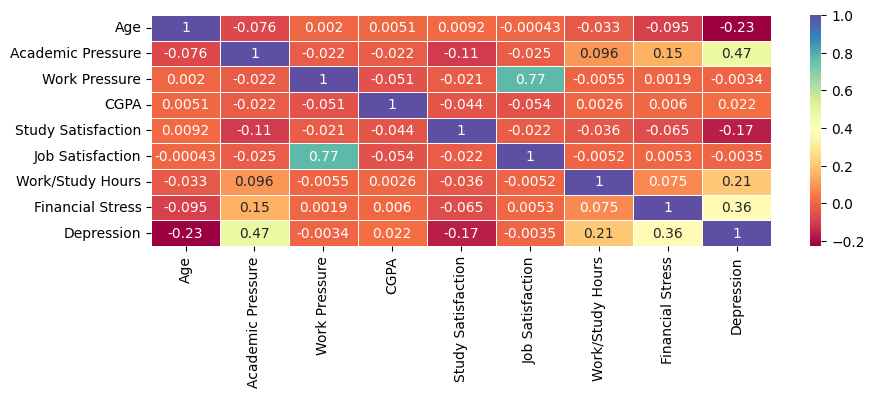

In [33]:
plt.figure(figsize = (10, 3))
df = df.drop(columns=["id", "Gender", "City", "Profession", "Sleep Duration", "Dietary Habits", "Degree" , "Have you ever had suicidal thoughts 0", "Family History of Mental Illness"])
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [35]:
df.corr()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.032928,-0.095052,-0.226422
Academic Pressure,-0.075803,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,0.095970,0.151853,0.474835
Work Pressure,0.002015,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.005468,0.001885,-0.003351
CGPA,0.005056,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,0.002604,0.005966,0.022210
Study Satisfaction,0.009235,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,-0.036441,-0.064865,-0.167971
Job Satisfaction,-0.000432,-0.024945,0.770652,-0.053631,-0.021907,1.000000,-0.005222,0.005250,-0.003482
Work/Study Hours,-0.032928,0.095970,-0.005468,0.002604,-0.036441,-0.005222,1.000000,0.075016,0.208563
Financial Stress,-0.095052,0.151853,0.001885,0.005966,-0.064865,0.005250,0.075016,1.000000,0.363595
Depression,-0.226422,0.474835,-0.003351,0.022210,-0.167971,-0.003482,0.208563,0.363595,1.000000


In [36]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139529,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437638,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


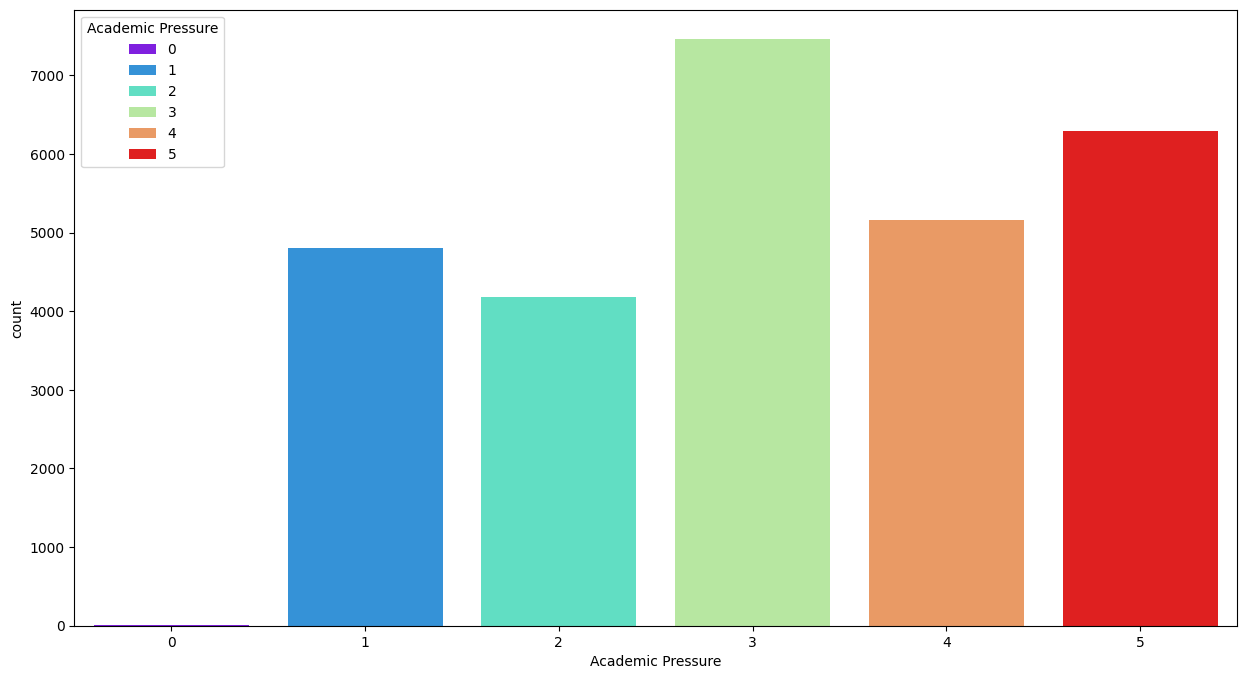

In [37]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["Academic Pressure"], data = df, palette = "rainbow", hue = "Academic Pressure")
plt.show()

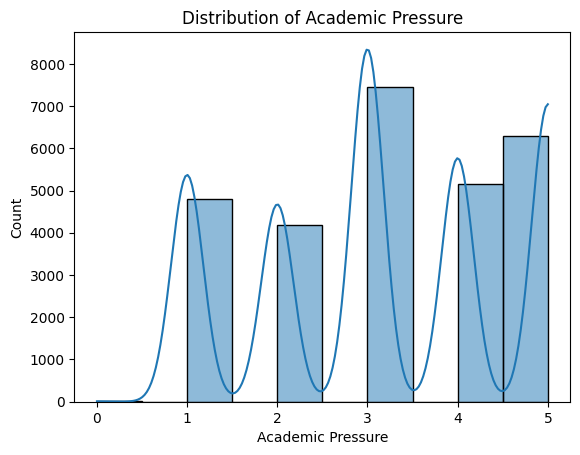

In [43]:
sns.histplot(df["Academic Pressure"], kde=True, bins=10)
plt.title("Distribution of Academic Pressure")
plt.show()

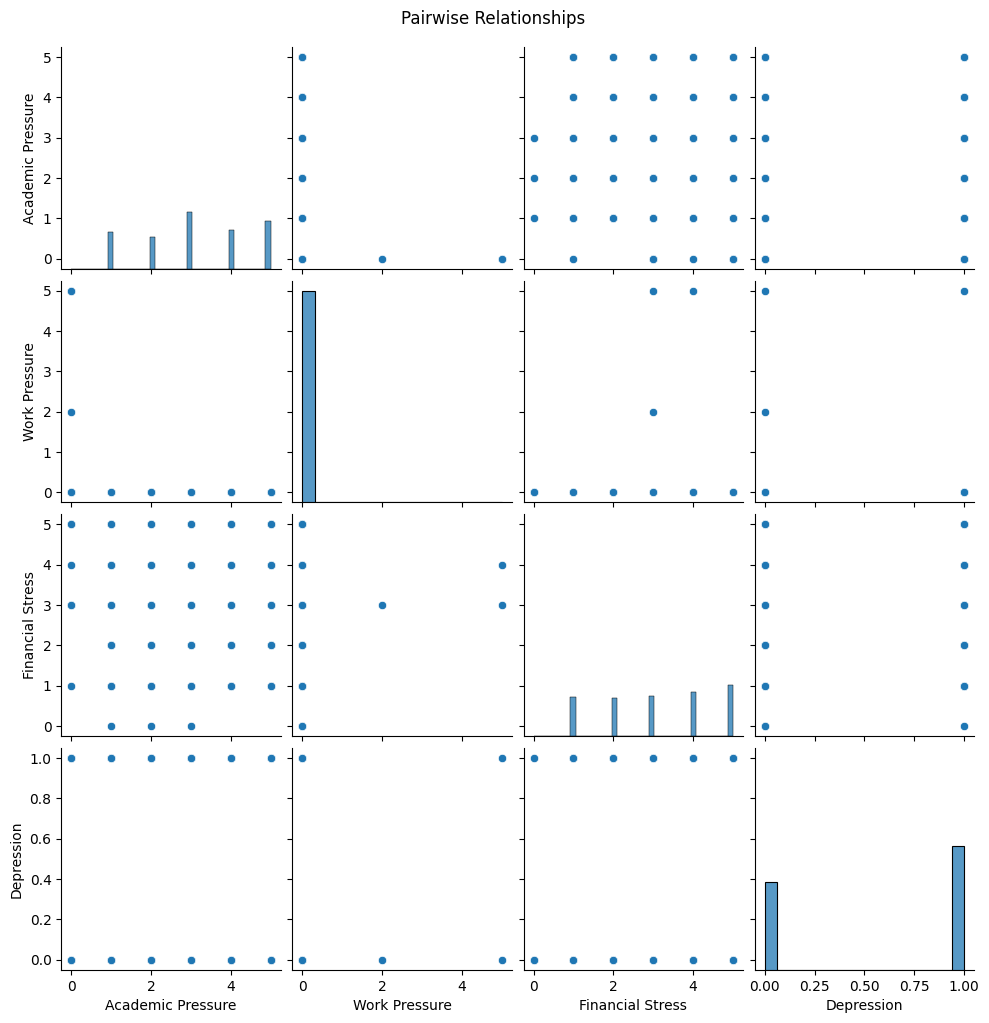

In [44]:
#this data sucks
sns.pairplot(df[["Academic Pressure", "Work Pressure", "Financial Stress", "Depression"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


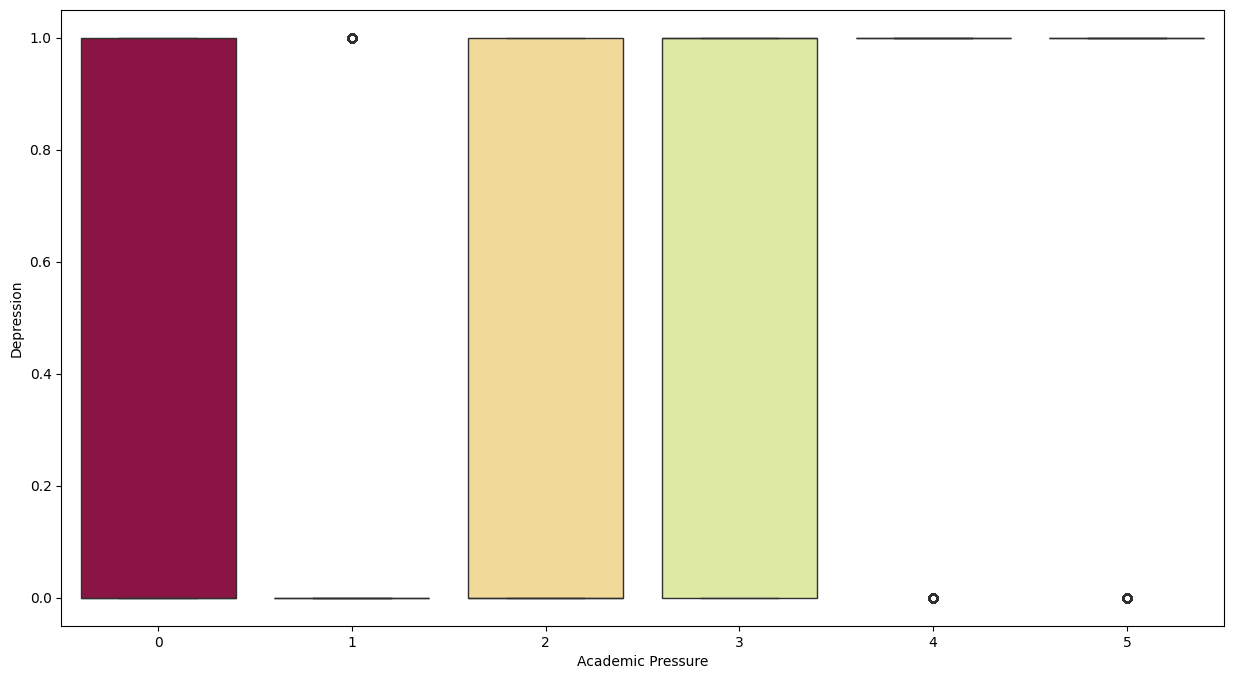

In [45]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "Academic Pressure", y = "Depression", data = df, palette = "Spectral", hue = "Academic Pressure", legend=False)
plt.show()